Data source: [Hotel booking demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand/version/1) 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


import all necessary libraries

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [4]:
# import data from csv
data = pd.read_csv('/content/gdrive/MyDrive/DataMining/hotel_bookings.csv')

In [5]:
# get basic info about the data
data.shape

(119390, 32)

Facts about data: 119390 rows and 32 columns

In [6]:
# printout first rows
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# get information about columns: number of non-null points and the type of all records for a columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# get more insights about records: for each column calculate number of unique values
unique_vals = {}
for col in sorted(data):
  unique_vals[col] = len(data.groupby(col)[col].unique());
sorted_vals = sorted(unique_vals.items(), key=lambda kv: kv[1])
for col in sorted_vals: 
  print("{column:30} - {unique:4} - {coltype}".format(column=col[0], unique=col[1], coltype=data.dtypes[col[0]]))

hotel                          -    2 - object
is_canceled                    -    2 - int64
is_repeated_guest              -    2 - int64
arrival_date_year              -    3 - int64
deposit_type                   -    3 - object
reservation_status             -    3 - object
customer_type                  -    4 - object
babies                         -    5 - int64
children                       -    5 - float64
distribution_channel           -    5 - object
meal                           -    5 - object
required_car_parking_spaces    -    5 - int64
total_of_special_requests      -    6 - int64
market_segment                 -    8 - object
reserved_room_type             -   10 - object
arrival_date_month             -   12 - object
assigned_room_type             -   12 - object
adults                         -   14 - int64
previous_cancellations         -   15 - int64
stays_in_weekend_nights        -   17 - int64
booking_changes                -   21 - int64
arrival_date_day_of_mo

In [9]:
# for specific features/columns print out info about unique values
features = ['deposit_type','customer_type', 'distribution_channel', 'meal', 'market_segment', 'reserved_room_type']
for feature in features:
  print(data.groupby(feature)[feature].agg('count'))
  print('\n')

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64


customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: customer_type, dtype: int64


distribution_channel
Corporate     6677
Direct       14645
GDS            193
TA/TO        97870
Undefined        5
Name: distribution_channel, dtype: int64


meal
BB           92310
FB             798
HB           14463
SC           10650
Undefined     1169
Name: meal, dtype: int64


market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: market_segment, dtype: int64


reserved_room_type
A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: reserved_room_type, dtype: int64




In [10]:
# check data for null values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# drop 'agent', 'company', 'country' and 'reservation_status_date'
# country columns stands for traveler origin, and there are a number of missing values
dt1 = data.drop(['agent', 'company', 'country', 'reservation_status_date'], axis='columns')

In [13]:
dt1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [14]:
# remove all null values
dt2 = dt1.dropna()
dt2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [15]:
dt2.shape

(119386, 28)

In [16]:
# find all dublicated rows
print('Number of Duplicate rows = {}'.format(dt2.duplicated().sum()))

Number of Duplicate rows = 34068


Each record in the dataset stands for a unique reservation and even if the records are dublicated that's because the personal information was removed from the dataset

Let's explore all columns that has type 'object' 

In [17]:
object_columns = []
for col in dt2:
  if dt2.dtypes[col] == np.object:
    object_columns.append(col)
    print(col)


hotel
arrival_date_month
meal
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status


In [18]:
for col in object_columns:
  print('Column: {}\n{}\n'.format(col, dt2[col].unique()))

Column: hotel
['Resort Hotel' 'City Hotel']

Column: arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Column: meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

Column: market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

Column: distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

Column: reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

Column: assigned_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']

Column: deposit_type
['No Deposit' 'Refundable' 'Non Refund']

Column: customer_type
['Transient' 'Contract' 'Transient-Party' 'Group']

Column: reservation_status
['Check-Out' 'Canceled' 'No-Show']



In [28]:
# remove rows with 'Undefined' distribution channel
dt2[dt2.distribution_channel == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guests,stay_length
14594,Resort Hotel,0,103,2015,July,28,5,2,3,2,1.0,0,HB,Direct,Undefined,0,0,0,A,A,0,No Deposit,0,Transient,112.7,1,2,Check-Out,3,5


In [24]:
dt3 = dt2[dt2.distribution_channel != 'Undefined']

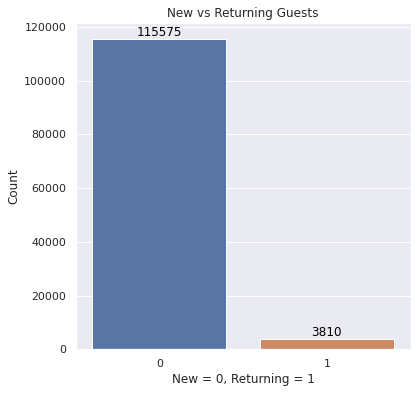

In [62]:
# Checking Number of Bookings made by returning guests vs bookings made by new guests
plt.figure(figsize=(6,6))
ax = sns.countplot(data=dt3, x='is_repeated_guest')

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('New vs Returning Guests')
plt.xlabel('New = 0, Returning = 1')
plt.ylabel('Count')
plt.show()

In [55]:
hotels_grouped = dt3.groupby('hotel')['hotel'].agg('count')
hotels_grouped.keys().tolist()
hotels_grouped.values.tolist()

[79326, 40059]

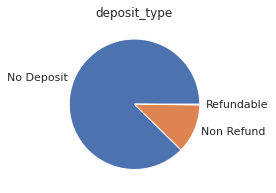

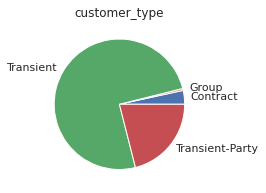

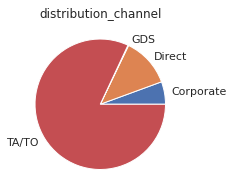

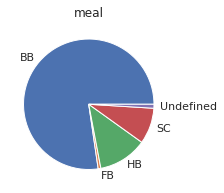

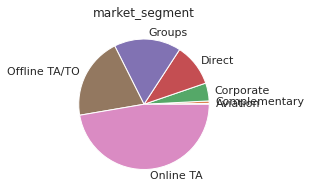

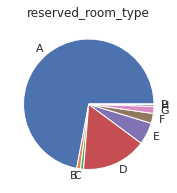

In [61]:
features = ['deposit_type','customer_type', 'distribution_channel', 'meal', 'market_segment', 'reserved_room_type']
for feature in features:
  'Column {}'.format(feature)
  fig = plt.gcf()
  fig.set_size_inches(3,3)
  feature_grouped = dt3.groupby(feature)[feature].agg('count')
  labels = feature_grouped.keys().tolist()
  data_points = feature_grouped.values.tolist()
  plt.title(feature)
  plt.pie(data_points, labels = labels)
  plt.show()
  print('\n')

In [25]:
# combine all guests (adults, children and babies) into one column
dt3['guests']=dt3['adults'].astype(int) + dt3['children'].astype(int) + dt3['babies'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#adding additional columns 'stay_length'
dt3['stay_length']=dt2['stays_in_week_nights'] + dt3['stays_in_weekend_nights']
dt3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guests,stay_length
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2,2.0


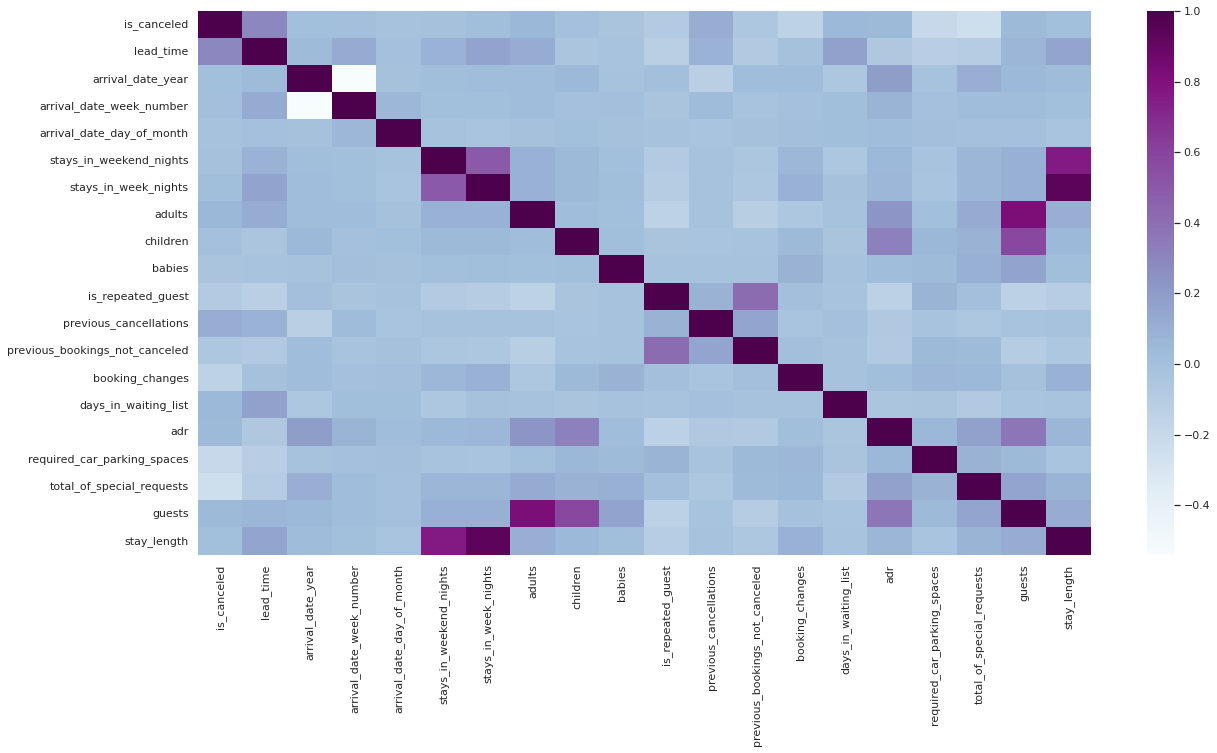

In [27]:
corrmat = dt3.corr()
sns.heatmap(corrmat, cmap="BuPu")